<a href="https://colab.research.google.com/github/besarria/Macroeconomia/blob/main/Aula_01_PIB%2C_Infla%C3%A7%C3%A3o_e_Desemprego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Macroeconomia 1 

```
Estagiário de docência: Flávio Macaúbas Torres Filho - flaviomacaubas@gmail.com
Docente: Cássio da Nóbrega Besarria - 
```

## Sumário da atividade:
* [Introdução ao Quandl](#quandl)
* [Noções básicas de pandas](#pandas)
* [Importação dos dados](#import_dados)
  * [PIB](#pib)
  * [Inflação](#ipca)
  * [Desemprego](*desemprego)


## Objetivos

- Criar uma conta na Quandl para os alunos e ensinar como acessar as informações;

- Importar e manipular dados do PIB, Inflação e Desemprego dos Estados Unidos.

- Compreensão básicas das funcionalidade das bibliotecas *quandl*, *pandas*, *seaborn* e *matplotlib*.


## Introdução ao Quandl <a class="anchor" id="quandl"></a>


> O Quandl é uma **fonte de dados financeiros, econômicos e dados terciários**. Fornece dados essenciais para análises financeiras e econômicas. Desde 2018 a plataforma pertence a Nasdaq, que é o segundo maior mercado de ações em capitalização do mundo.

### Como acessar os dados do Quandl?

1. Acessar o site: https://data.nasdaq.com/sign-up

2. Escolher como propósito de uso **Academic**

3. Utilizar, de preferência, o email acadêmico em **School email address**

4. Responder as pergunta "How will you be using this data" como **As student**

5. Em seguida você irá receber sua **Api Key** (sempre que necessário você pode consultá-la no seu perfil)



## Noções básicas de pandas <a class="anchor" id="pandas"></a>

Pandas é uma biblioteca de código aberto de Python, criada desde 2008, com o objetivo de auxiliar em análise práticas e do mundo real em Python. Tem o propósito de se tornar a maior, mais poderosa e flexível, ferramenta de código aberto para análise de dados.

Panda é uma ferramenta com os seguintes objetivos:

- Acessibilidade para todas as pessoas;

- Gratuito para uso e modificações;

- Flexível;

- Poderoso;

- Fácil de usar;

- Rápido.


### Qual a lógica de um objeto pandas? Uma espécie de planilha eletrônica!


![pandas_resumo](https://www.codingame.com/servlet/fileservlet?id=40806889856497)


Mais informações:
> [Pandas](https://pandas.pydata.org/)

> [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Importação e Manipulação dos dados <a class="anchor" id="import_dados"></a>

### Instalações necessárias

In [ ]:
!pip install quandl # Comando reservado para instalação de pacotes não nativos do Colab

### Bibliotecas necessárias

In [ ]:
import quandl # Biblioteca Quandl para acesso dos dados
import pandas as pd # Manipulação de DataFrames

# Dataviz
import matplotlib.pyplot as plt 
import seaborn as sns 

### Definindo API-KEY
API_KEY = "wpp-1VMUJpuqiG8qRBUa"

### Configurações globais de plotagem

In [ ]:
# Configurações globais
sns.set_style('whitegrid') # background
sns.set_context('paper') # Formato artigo
sns.set_palette('deep') 

# Ajusta imagem no aspect/ratio
plt.tight_layout()

# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 15,
              'figure.figsize': (12,8), # Largura e altura
              'axes.labelsize': 'x-large', 
              'axes.titlesize':'x-large',
              'xtick.labelsize':'x-large',
              'ytick.labelsize':'x-large'}

# Atualiza os padrões que defini acima
plt.rcParams.update(parametros);

<Figure size 432x288 with 0 Axes>

### Produto Interno Bruto 

> O nível de produção da economia como um todo e sua taxa de crescimento. (BLANCHARD, 2013, p.3)

Matematicamente, podemos entender o produto como:

> $PIB_{t} = \sum_{i = 1}^{n} P_{i,t}Q_{i,t}$

Esta forma de calcular o produto interno produto chamamos de **PIB Nominal.** Complermentamente, existe o **PIB Real**, este é calculado quando descontamos o efeito do aumento dos preços.

O PIB pode ser encarado por diferentes óticas, por exemplo, pela ótica da demanda temos:

> PIB = consumo das famílias + investimento das firmas + gastos do governo + exportações líquidas

Ou simplesmente:

> Y = C + I + G + NX

Uma abordagem similarmente interessante, é pela ótica da renda:

> PIB = salários + lucros e aluguéis + juros + impostos indiretos

Futuramente vocês verão que os rendimentos estão associados a **produtividade**, logo, o PIB está diretamente relacionado a produtividade de uma região/país.

In [ ]:
# Atributos necessários
CODIGO_SERIE = "FRED/GDP"
DATA_INICIO = "1946-12-31" # AAAA-MM-DD
DATA_FIM = "2021-12-31" # AAAA-MM-DDD

# Snake case 
# Lendo os dados do PIB EUA Nominal Anual (U$ Bilhões) - Dessazonalizado 
pib_nominal_eua = quandl.get(dataset = CODIGO_SERIE, 
                     authtoken = API_KEY, 
                     start_date = DATA_INICIO, 
                     end_date = DATA_FIM,
                     collapse="annual") 

In [ ]:
# Forma alternativa de leitura
pib_real_eua = quandl.get(dataset = "FRED/GDPC1", 
                          authtoken = "wpp-1VMUJpuqiG8qRBUa", 
                          start_date = "1946-12-31", 
                          end_date = "2021-12-31",
                          collapse="annual") 

In [ ]:
# Visualizando os 5 primeiros elementos
pib_nominal_eua.head(5)

,Value
Date,
1947-12-31,259.745
1948-12-31,280.366
1949-12-31,270.627
1950-12-31,319.945
1951-12-31,356.178


In [ ]:
# Visualizando os 5 primeiros elementos
pib_real_eua.head(5)

,Value
Date,
1947-12-31,2056.508
1948-12-31,2136.440
1949-12-31,2103.688
1950-12-31,2384.920
1951-12-31,2515.408


In [ ]:
# Visualizando os 5 últimos elementos
pib_nominal_eua.tail(5)

,Value
Date,
2017-12-31,19882.965
2018-12-31,20813.325
2019-12-31,21694.458
2020-12-31,21477.597
2021-12-31,23992.355


In [ ]:
# Verificar tipagem
type(pib_nominal_eua)

pandas.core.frame.DataFrame

In [ ]:
# Informações da base
pib_nominal_eua.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 1947-12-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   75 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [ ]:
# Colunas do dataframe
pib_nominal_eua.columns

Index(['Value'], dtype='object')

In [ ]:
# Acessando os índices do dataframe
pib_nominal_eua.index

DatetimeIndex(['1947-12-31', '1948-12-31', '1949-12-31', '1950-12-31',
               '1951-12-31', '1952-12-31', '1953-12-31', '1954-12-31',
               '1955-12-31', '1956-12-31', '1957-12-31', '1958-12-31',
               '1959-12-31', '1960-12-31', '1961-12-31', '1962-12-31',
               '1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31',
               '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31',
               '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31',
               '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31',
               '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31',
               '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31',
               '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31',
               '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
               '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
      

In [ ]:
pib_nominal_eua.Value

Date
1947-12-31      259.745
1948-12-31      280.366
1949-12-31      270.627
1950-12-31      319.945
1951-12-31      356.178
                ...    
2017-12-31    19882.965
2018-12-31    20813.325
2019-12-31    21694.458
2020-12-31    21477.597
2021-12-31    23992.355
Name: Value, Length: 75, dtype: float64

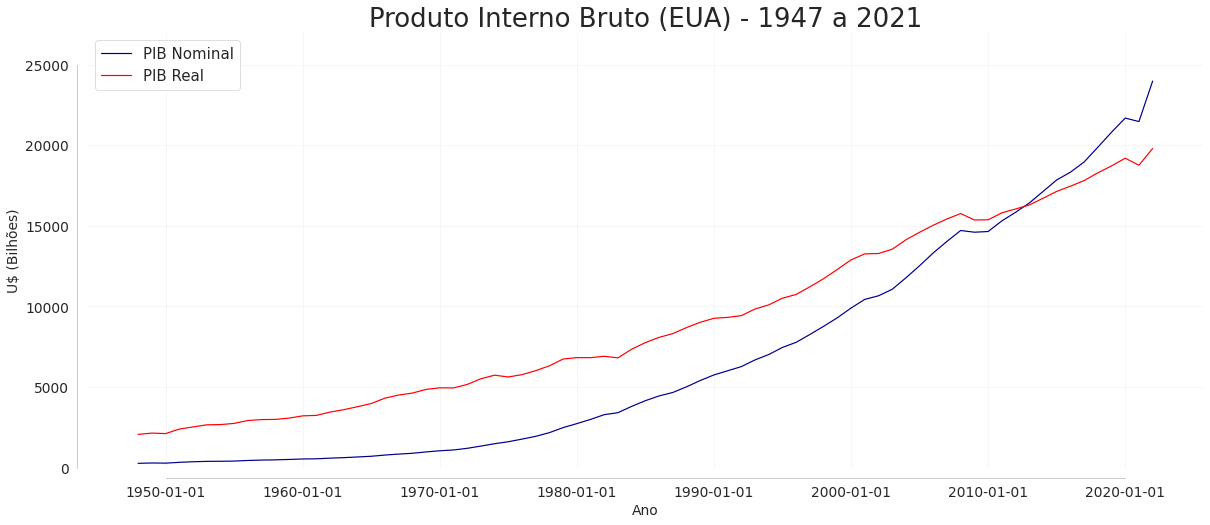

In [ ]:
# Dataviz - Gráfico de Linha

# Dimensões do gráfico
fig, ax = plt.subplots(figsize=(20, 8))

# Atributos
INDICES = pib_nominal_eua.index
VALORES = pib_nominal_eua['Value']

# Construindo Gráfico
ax = sns.lineplot(x = INDICES, 
                  y = VALORES,
                  color = 'Darkblue',
                  label = 'PIB Nominal')

# Forma alternativa de construção
ax = sns.lineplot(x = pib_real_eua.index,
                  y = pib_real_eua.Value,
                  color = 'Red',
                  label = 'PIB Real')

# Título e eixos
ax.set(xlabel = 'Ano', 
       ylabel = 'U$ (Bilhões)')

# Título
ax.axes.set_title('Produto Interno Bruto (EUA) - 1947 a 2021', fontsize=26)

# Definir limite do eixo
ax.set_ylim(0, 27000)

# Opacidade do grid 
ax.grid(alpha = 0.2)

# Formato dos eixos
sns.despine(offset = 10, trim = True)

### Deflator do PIB

Também é conhecido como **deflator implícito de preços para o PIB**. Formalmente, ele é dado por:

> $Deflator\;do\;PIB = \frac{PIB\;Nominal}{PIB\;Real}$

Consequentemente, o PIB Nominal vai ser:

> $PIB\;Nominal = PIB\;Real \times Deflator\;do\;PIB $

Analogamente:

> $PIB\;Real = \frac{PIB\;Nominal}{Deflator\;do\;PIB} $

In [ ]:
# Calculando o deflator do PIB
# Juntando os dados 
pib = pd.concat([pib_nominal_eua, pib_real_eua], axis = 1)

# Renomeando as colunas
pib.columns = ['PIB Nominal','PIB Real']

pib.head()

,PIB Nominal,PIB Real
Date,,
1947-12-31,259.745,2056.508
1948-12-31,280.366,2136.440
1949-12-31,270.627,2103.688
1950-12-31,319.945,2384.920
1951-12-31,356.178,2515.408


In [ ]:
# Calculando o deflator
pib['Deflator'] = pib['PIB Nominal'] / pib['PIB Real']

pib.head()

,PIB Nominal,PIB Real,Deflator,COLUNA C
Date,,,,
1947-12-31,259.745,2056.508,0.126304,0.126304
1948-12-31,280.366,2136.440,0.131230,0.131230
1949-12-31,270.627,2103.688,0.128644,0.128644
1950-12-31,319.945,2384.920,0.134153,0.134153
1951-12-31,356.178,2515.408,0.141599,0.141599


In [ ]:
pib.tail()

,PIB Nominal,PIB Real,Deflator
Date,,,
2017-12-31,19882.965,18296.685,1.086698
2018-12-31,20813.325,18721.281,1.111747
2019-12-31,21694.458,19202.310,1.129784
2020-12-31,21477.597,18767.778,1.144387
2021-12-31,23992.355,19805.962,1.211370


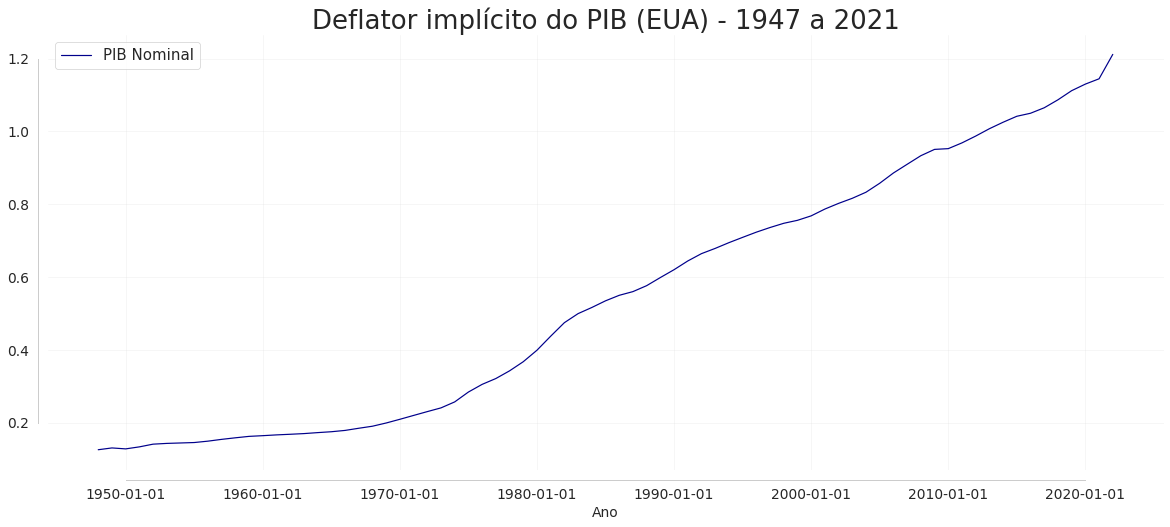

In [ ]:
# Dataviz - Gráfico de Linha

# Dimensões do gráfico
fig, ax = plt.subplots(figsize=(20, 8))

# Atributos
INDICES = pib.index
VALORES = pib['Deflator']

# Construindo Gráfico
ax = sns.lineplot(x = INDICES, 
                  y = VALORES,
                  color = 'Darkblue',
                  label = 'PIB Nominal')

# Título e eixos
ax.set(xlabel = 'Ano', 
       ylabel = '')

# Título
ax.axes.set_title('Deflator implícito do PIB (EUA) - 1947 a 2021', fontsize=26)

# Opacidade do grid 
ax.grid(alpha = 0.2)

# Formato dos eixos
sns.despine(offset = 10, trim = True)

### PIB per capita

Um importante resultado para mensuração do densolvimento de uma nação é o PIB per capita. Que é quando dividimo o PIB pela população do país, dessa forma, colocamos a produção de forma relativa permitindo uma melhor comparabilidade entre as nações.

In [ ]:
# Atributos necessários
DATA_INICIO = "1960-12-31"
DATA_FIM = "2021-12-31"

# Lendo os dados do PIB per capita EUA, BR, CN e ALE - Dessazonalizado 
ppc = quandl.get(dataset = ["FRED/PCAGDPUSA646NWDB", # EUA
                            "FRED/PCAGDPBRA646NWDB", # BR
                            "FRED/PCAGDPCNA646NWDB", # CN
                            "FRED/PCAGDPDEA646NWDB"] , # ALE
                     authtoken = API_KEY, 
                     start_date = DATA_INICIO, 
                     end_date = DATA_FIM,
                     collapse="annual") 

# Renomeando colunas
ppc.columns = ['EUA', 'Brasil', 'China', 'Alemanha']

ppc.head()

# NaN - not a number

,EUA,Brasil,China,Alemanha
Date,,,,
1961-12-31,3066.562869,205.040782,75.805838,NaN
1962-12-31,3243.843078,260.425650,70.909412,NaN
1963-12-31,3374.515171,292.252173,74.313643,NaN
1964-12-31,3573.941185,261.666616,85.498555,NaN
1965-12-31,3827.527110,261.354345,98.486778,NaN


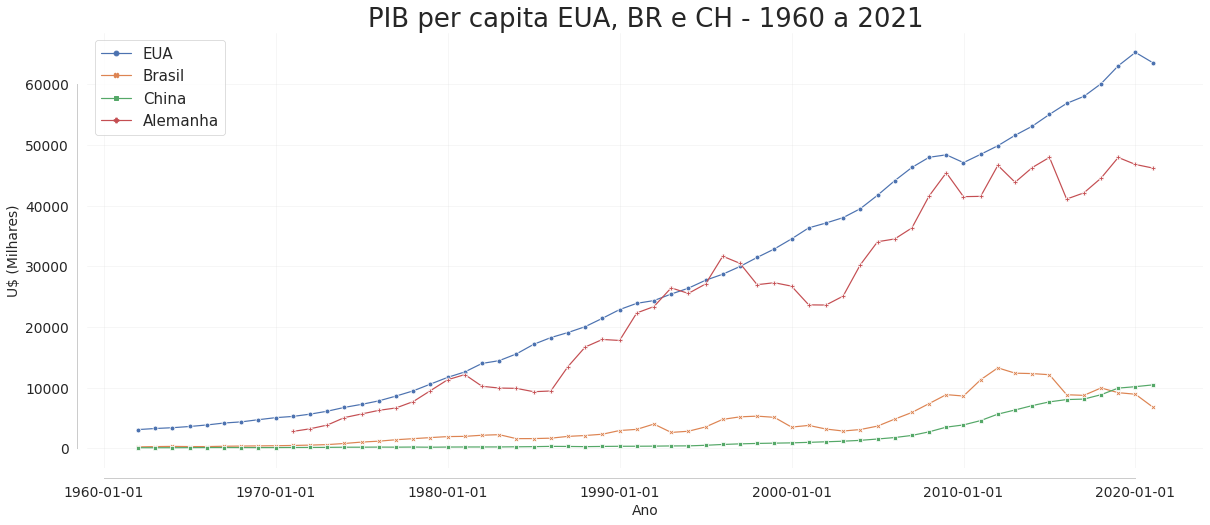

In [ ]:
# Dataviz - Gráfico de Linha

# Dimensões do gráfico
fig, ax = plt.subplots(figsize=(20, 8))

# Construindo Gráfico EUA
ax = sns.lineplot(data = ppc,
                  color = ['Darkblue', 'Darkgreen', 'Red', 'Darkorange'],
                  dashes = False,
                  markers = True)

# Título e eixos
ax.set(xlabel = 'Ano', 
       ylabel = 'U$ (Milhares)')

# Título
ax.axes.set_title('PIB per capita EUA, BR e CH - 1960 a 2021', fontsize=26)


# Opacidade do grid 
ax.grid(alpha = 0.2)

# Formato dos eixos
sns.despine(offset = 10, trim = True)

In [ ]:
# Diferença entre o pib do EUA e BR
ppc['Dif_BR_EUA'] = ppc['EUA'] - ppc['Brasil']

ppc.head()

,EUA,Brasil,China,Alemanha,Dif_BR_EUA
Date,,,,,
1961-12-31,3066.562869,205.040782,75.805838,NaN,2861.522087
1962-12-31,3243.843078,260.425650,70.909412,NaN,2983.417428
1963-12-31,3374.515171,292.252173,74.313643,NaN,3082.262998
1964-12-31,3573.941185,261.666616,85.498555,NaN,3312.274568
1965-12-31,3827.527110,261.354345,98.486778,NaN,3566.172765


In [ ]:
# Filtragem
ppc.loc[ppc.index == "2000-12-31"]

,EUA,Brasil,China,Alemanha,Dif_BR_EUA
Date,,,,,
2000-12-31,36334.908777,3749.753271,959.372484,23635.92922,32585.155506


### Inflação


> A taxa de aumento do preço médio dos bens da economia no
decorrer do tempo. (BLANCHARD, 2013, p.3)

Inflação também pode ser entendida como um aumento genérico e contínuo dos preços de uma economia. As principais causas são diversas, pra um melhor entendimento:


![infla_causas](https://estaticog1.globo.com/2013/05/inflacao/page4/images/006GraficoPqOsPrecosSobem.jpg)

Fonte: Portal G1, disponível em: [Quais as causas da inflação?](http://g1.globo.com/economia/inflacao-causas/platb#:~:text=%22A%20infla%C3%A7%C3%A3o%20pode%20ter%20uma,por%20bens%20e%20servi%C3%A7os).




In [ ]:
# Atributos necessários
CODIGO_SERIE = "FRED/FPCPITOTLZGUSA"
DATA_INICIO = "1960-12-31"
DATA_FIM = "2020-12-31"

# Lendo os dados do IPC - Dessazonalizado 
inflacao_eua = quandl.get(dataset = CODIGO_SERIE, 
                          authtoken = API_KEY, 
                          start_date = DATA_INICIO, 
                          end_date = DATA_FIM,
                          collapse="annual") 

In [ ]:
inflacao_eua.head()

,Value
Date,
1961-12-31,1.070724
1962-12-31,1.198773
1963-12-31,1.239669
1964-12-31,1.278912
1965-12-31,1.585169


In [ ]:
# Estatística descritiva
inflacao_eua.describe()

,Value
count,60.000000
mean,3.717105
std,2.781502
min,-0.355546
25%,1.876588
50%,2.983366
75%,4.294709
max,13.549202


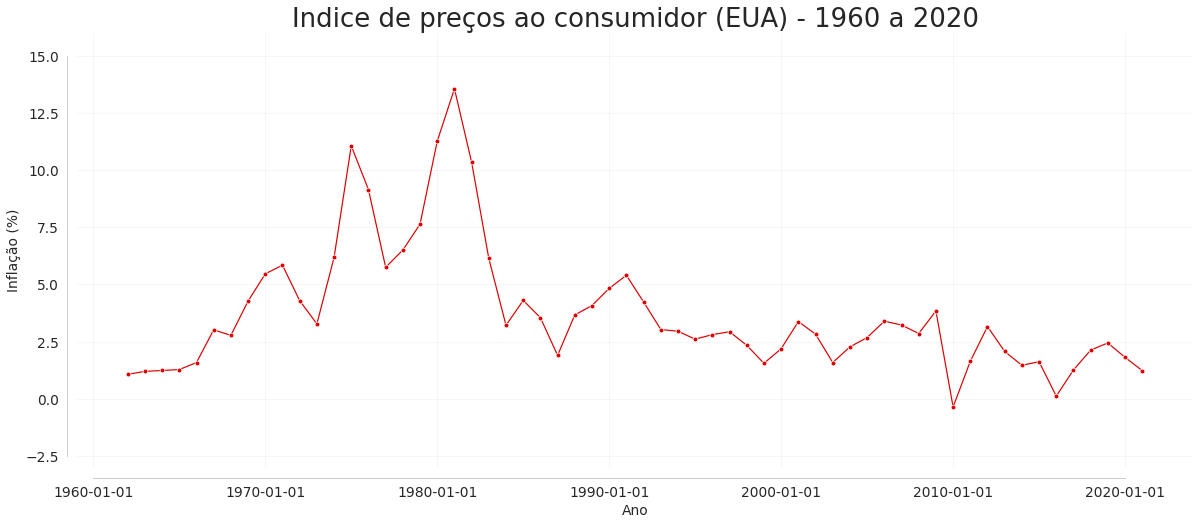

In [ ]:
# Dataviz - Gráfico de Linha

# Dimensões do gráfico
fig, ax = plt.subplots(figsize=(20, 8))

# Atributos
INDICES = inflacao_eua.index
VALORES = inflacao_eua['Value']

# Construindo Gráfico
ax = sns.lineplot(x = INDICES, 
                  y = VALORES,
                  color = '#de0000',
                  marker = 'o') # A cor também pode ser em hexadecimal

# Título e eixos
ax.set(xlabel = 'Ano', 
       ylabel = 'Inflação (%)')

# Título
ax.axes.set_title('Indice de preços ao consumidor (EUA) - 1960 a 2020', fontsize=26)

# Definir limite do eixo
ax.set_ylim(-3, 16)

# Opacidade do grid 
ax.grid(alpha = 0.2)

# Formato dos eixos
sns.despine(offset = 10, trim = True);

### Deflator x Inflação

Há três diferenças essenciais entre o deflator do PIB e a inflação:

1. O deflator do PIB mede **todos os preços** de bens e serviços produzidos. A inflação mede **somente** os preços dos bens e serviços adquiridos pelos consumidores;

2. O deflator inclui apenas os bens e serviços **produzidos internamente**, consequentemente, uma variação de um bem produzido fora do país não é capturado pelo deflator;

3. O IPC (IPCA no brasil) atribuí pesos fixos aos preços de diferentes bens, enquanto os pesos do deflator pode variar.

>> Em caso de dúvida neste último ponto, vocês podem revisitar os indícies de preços de *Laspeyres* e *Paasche*.

### Desemprego

> A proporção de trabalhadores em uma economia que não
estão empregados e procuram uma vaga. (BLANCHARD, 2013, p.3)

É importante destacar que só é considerado desempregado, aquele agente econômico que procura **desejam emprego** mas não encontram. É importante destacar este aspecto porque, em toda economia, existe uma chamada **taxa natural de desemprego**.

Além disso, aquelas pessoas que desejam um emprego mas **desistiram de procurar** são chamados de **desalentados** e não são contabilizados no desemprego.

Assim, podemos entender a força de trabalho de um país como:

> $Força\;de\;Trabalho = Nº\;Pessoas\;Empregadas + Nº\;Pessoas\;Desempregadas$

Consequentemente:

> $ Taxa\;de\;Desemprego = \frac{Nº\;Pessoas\;Desempregadas}{Força\;de\;Trabalho} \times 100$

In [ ]:
# Atributos necessários
CODIGO_SERIE = "FRED/UNRATE"
DATA_INICIO = "1948-12-31"
DATA_FIM = "2021-12-31"

# Lendo os dados do Desemprego de Civil em (%) - Dessazonalizado 
desemprego_eua = quandl.get(dataset = CODIGO_SERIE, 
                            authtoken = API_KEY, 
                            start_date = DATA_INICIO, 
                            end_date = DATA_FIM,
                            collapse="annual") 

In [ ]:
# Estatística descritiva
desemprego_eua.describe()

,Value
count,73.000000
mean,5.746575
std,1.629850
min,2.700000
25%,4.500000
50%,5.500000
75%,6.600000
max,10.800000


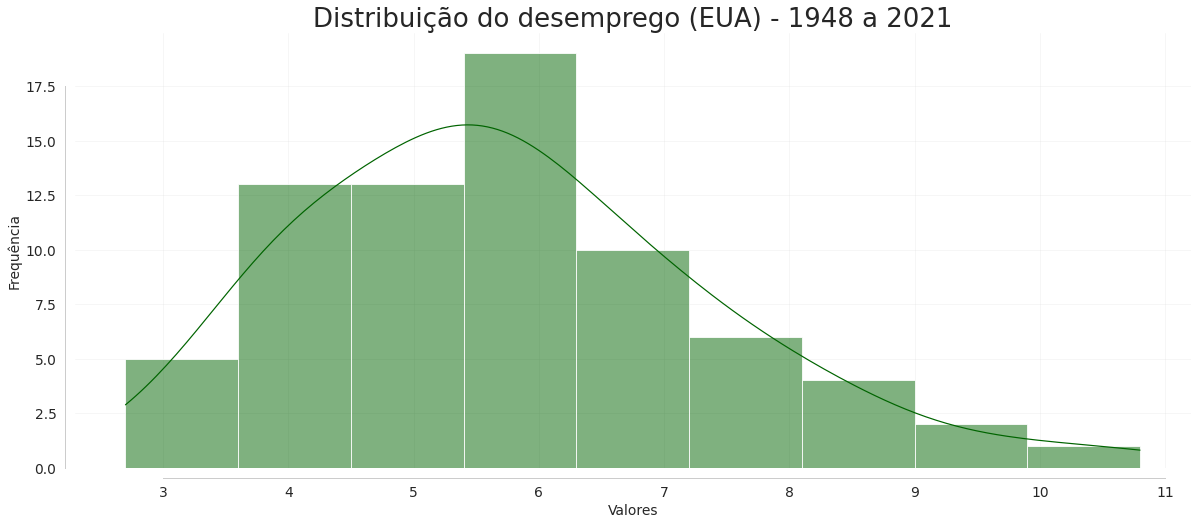

In [ ]:
# Dataviz - Histograma

# Dimensões do gráfico
fig, ax = plt.subplots(figsize=(20, 8))

# Gráfico
ax = sns.histplot(data = desemprego_eua, 
                  x="Value",
                  color = 'Darkgreen', 
                  kde=True)

# Título e eixos
ax.set(xlabel = 'Valores',
       ylabel = 'Frequência')

# Título
ax.axes.set_title('Distribuição do desemprego (EUA) - 1948 a 2021', fontsize=26)

# Opacidade do grid 
ax.grid(alpha = 0.2)


# Formato dos eixos
sns.despine(offset = 10, trim = True);

### Relação desemprego e inflação

In [ ]:
# Juntando os dados
infla_desem = pd.concat([inflacao_eua, desemprego_eua], axis = 1)

# Renomeando as colunas
infla_desem.columns = ['inflacao','desemprego']

# Visualizando 15 primeiras observações
infla_desem.head(15)

,inflacao,desemprego
Date,,
1949-12-31,NaN,6.6
1950-12-31,NaN,4.3
1951-12-31,NaN,3.1
1952-12-31,NaN,2.7
1953-12-31,NaN,4.5
1954-12-31,NaN,5.0
1955-12-31,NaN,4.2
1956-12-31,NaN,4.2
1957-12-31,NaN,5.2


In [ ]:
# Verificando valores ausentes
infla_desem.isna().sum()

inflacao      13
desemprego     0
dtype: int64

In [ ]:
# Retirando valores ausentes
infla_desem = infla_desem.dropna()

# Visualizando 10 primeiras observçaões
infla_desem.head()

,inflacao,desemprego
Date,,
1961-12-31,1.070724,6.0
1962-12-31,1.198773,5.5
1963-12-31,1.239669,5.5
1964-12-31,1.278912,5.0
1965-12-31,1.585169,4.0


In [ ]:
# Filtrando dados apenas para observações até 1970
infla_desem = infla_desem.loc[infla_desem.index <= '1970-12-31']

# Redefinindo index apenas para ano 
infla_desem.index = pd.DatetimeIndex(infla_desem.index).year

# Visualizando dataframe
infla_desem

,inflacao,desemprego
Date,,
1961,1.070724,6.0
1962,1.198773,5.5
1963,1.239669,5.5
1964,1.278912,5.0
1965,1.585169,4.0
1966,3.015075,3.8
1967,2.772786,3.8
1968,4.271796,3.4
1969,5.462386,3.5


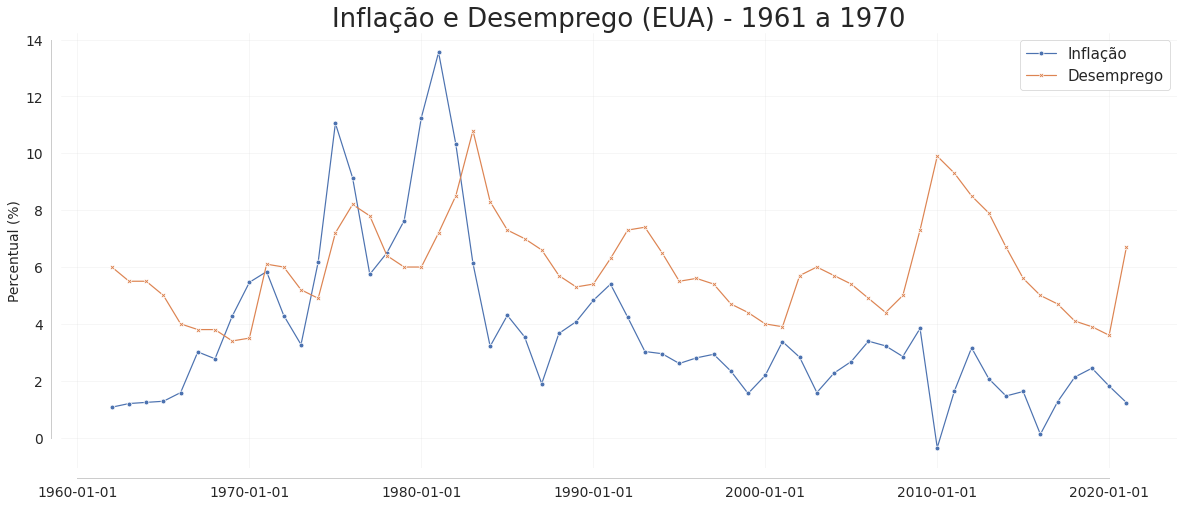

In [ ]:
# Dimensões do gráfico
fig, ax = plt.subplots(figsize=(20, 8))

# Gráfico
ax = sns.lineplot(data = infla_desem,
                  color = ['Darkred', 'Darkgreen'],  
                  dashes = False,
                  markers = True)

# Título e eixos
ax.set(xlabel = '',
       ylabel = 'Percentual (%)')

# Legendas
plt.legend(loc='best', # Localização da legenda - best melhor local possível
           labels=['Inflação', 'Desemprego'])

# Tamanho do título
ax.axes.set_title('Inflação e Desemprego (EUA) - 1961 a 1970', fontsize=26)

# Opacidade do grid 
ax.grid(alpha = 0.2)

# Formato dos eixos
sns.despine(offset = 10, trim = True);

**Qual a relação que vocês conseguem identificar entre essas duas variáveis?**